In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_json(r'channel_messages.json', encoding='utf8')
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,views,forwards,replies,edit_date,post_author,grouped_id,reactions,restriction_reason,ttl_period,action
0,Message,240095,"{'_': 'PeerChannel', 'channel_id': 1101170442}",2024-04-07 16:42:09+00:00,,False,False,False,True,True,...,152953.0,138.0,NaN,None,NaN,1.370007e+16,NaN,[],NaN,NaN
1,Message,240094,"{'_': 'PeerChannel', 'channel_id': 1101170442}",2024-04-07 16:42:09+00:00,Кадры с места нападения на полицейских в Подмо...,False,False,False,True,True,...,155986.0,138.0,NaN,None,NaN,1.370007e+16,NaN,[],NaN,NaN
2,Message,240093,"{'_': 'PeerChannel', 'channel_id': 1101170442}",2024-04-07 16:38:14+00:00,Губернатор Оренбуржья поручил подготовить доку...,False,False,False,True,True,...,172343.0,34.0,NaN,None,NaN,NaN,NaN,[],NaN,NaN
3,Message,240092,"{'_': 'PeerChannel', 'channel_id': 1101170442}",2024-04-07 16:27:44+00:00,Сотрудники подмосковной полиции разыскивают му...,False,False,False,True,True,...,207110.0,171.0,NaN,None,NaN,NaN,NaN,[],NaN,NaN
4,Message,240091,"{'_': 'PeerChannel', 'channel_id': 1101170442}",2024-04-07 16:17:29+00:00,Дежурные средства ПВО около 18.00 уничтожили ч...,False,False,False,True,True,...,234539.0,35.0,NaN,None,NaN,NaN,NaN,[],NaN,NaN


In [3]:
df = df.sort_values(by='date')
df['date'] = df['date'].dt.date
date = df['date']
df.head()
counts = date.value_counts()
print(counts)

date
2024-03-23    421
2024-03-22    369
2024-03-17    332
2024-03-25    242
2024-02-29    227
2024-03-18    226
2024-03-26    224
2024-03-15    220
2024-03-19    209
2024-03-12    209
2024-03-13    198
2024-03-14    196
2024-03-27    187
2024-03-21    186
2024-04-03    181
2024-03-06    180
2024-04-04    174
2024-04-02    172
2024-04-01    169
2024-03-24    169
2024-02-21    169
2024-03-07    165
2024-03-11    157
2024-03-01    154
2024-04-05    147
2024-02-20    147
2024-02-22    147
2024-03-20    147
2024-03-05    146
2024-03-04    146
2024-04-06    145
2024-03-28    145
2024-02-28    145
2024-03-29    136
2024-02-19    130
2024-02-26    129
2024-02-27    125
2024-03-16    119
2024-03-02    118
2024-02-23    109
2024-03-30     96
2024-03-31     90
2024-04-07     86
2024-02-17     84
2024-02-25     78
2024-03-10     75
2024-03-03     67
2024-02-16     67
2024-03-09     64
2024-03-08     63
2024-02-24     59
2024-02-18     54
Name: count, dtype: int64


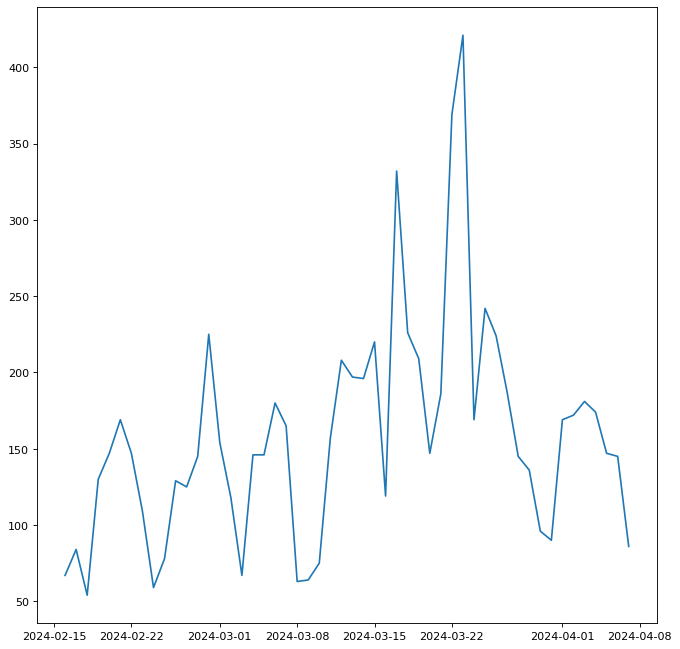

In [4]:
df_1 = df.groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

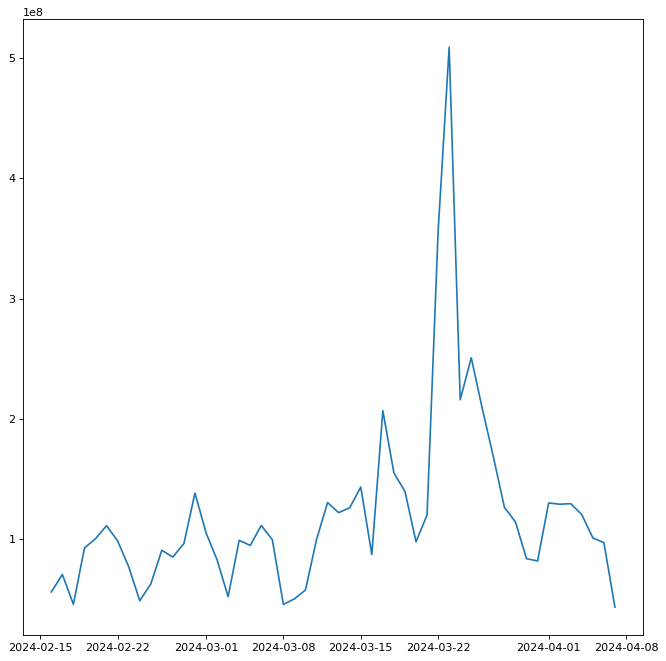

In [5]:
df_1 = df.groupby('date')['views'].sum()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

In [6]:
def spbu_or_msu(text):
    if pd.notna(text):
        pattern = re.compile(r'[Сс][Пп][Бб][Гг][Уу]|[Мм][Гг][Уу]|[Ss][Pp][Bb][Uu]|[Mm][Ss][Uu]|[Сс]анкт-[Пп]етербургский государственный университет|[Мм]осковский государственный университет')
        find_list = pattern.findall(text)
        list_to_write = []
        for i in find_list:
            if i[0].upper() == 'С' or i[0].upper() == 'S':
                list_to_write.append('СПбГУ')
            elif i[0].upper() == 'М' or i[0].upper() == 'M':
                list_to_write.append('МГУ')
        return list_to_write
    return []

<Axes: >

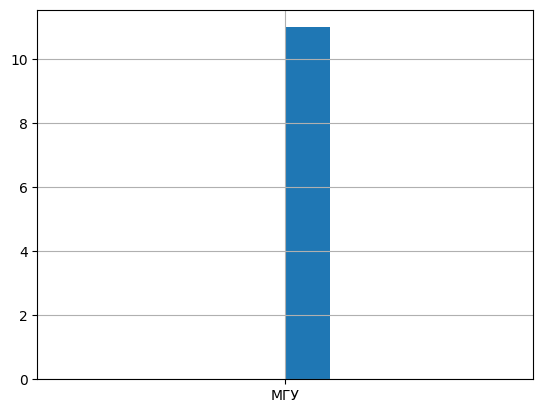

In [7]:
df['uni'] = df.message.apply(lambda x: spbu_or_msu(x))
df['uni'].explode().hist()

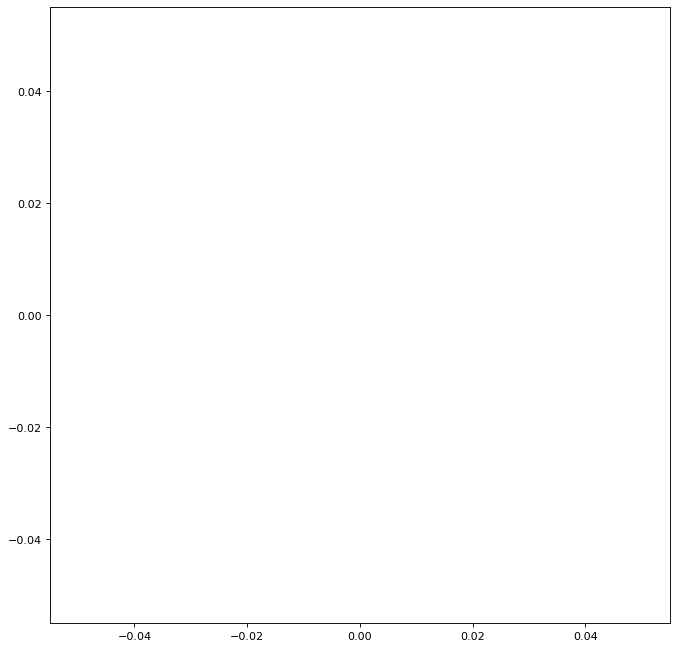

In [8]:
df_1 = df[df['uni'].explode() == 'СПбГУ'].groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

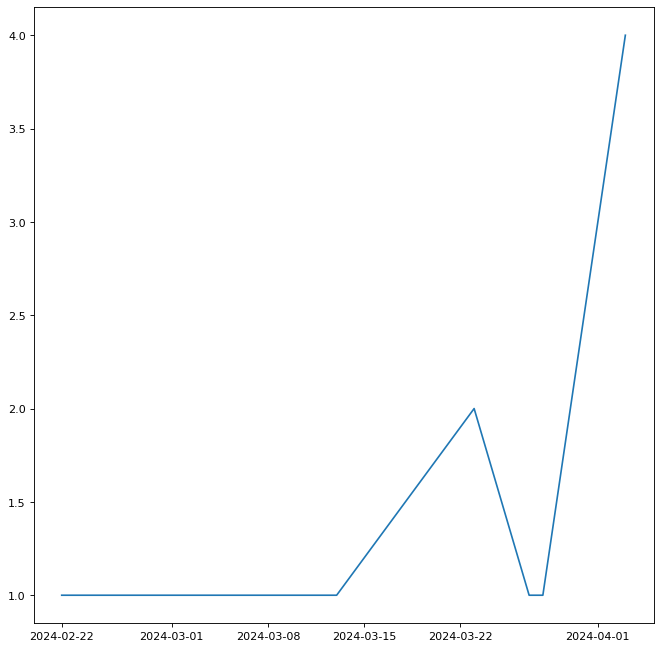

In [9]:
df_1 = df[df['uni'].explode() == 'МГУ'].groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

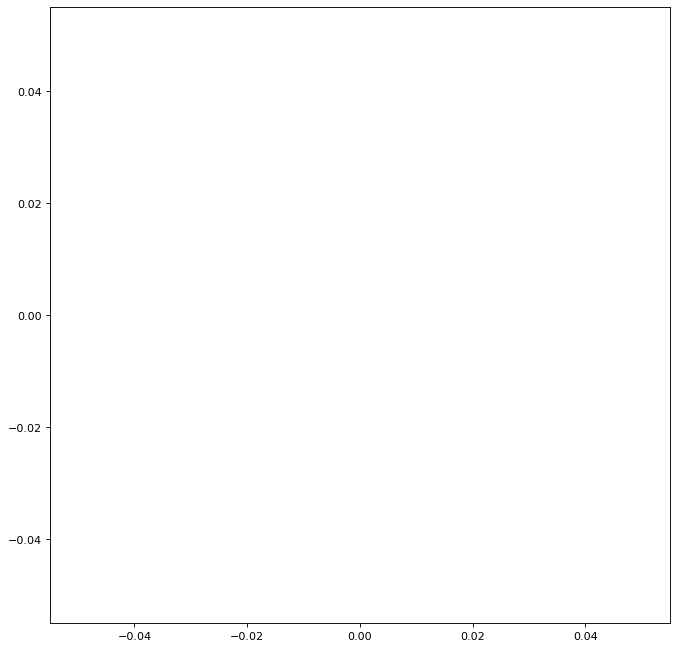

In [10]:
df_1 = df[df['uni'].explode() == 'СПбГУ'].groupby('date')['views'].sum()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

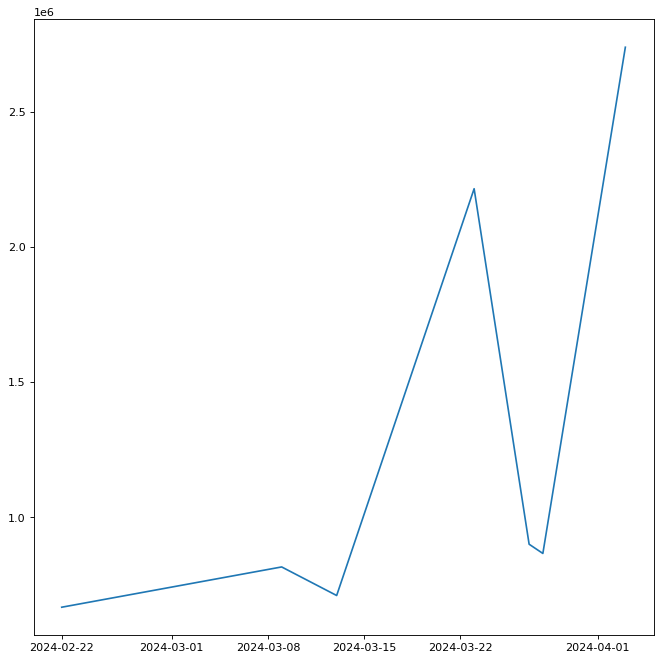

In [11]:
df_1 = df[df['uni'].explode() == 'МГУ'].groupby('date')['views'].sum()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)